In [54]:
import os

import scripts.helpers as helpers
helpers.add_backend_to_path()

import app.courses as courses


course_client = courses.CourseClient(os.path.join("..", "web", "backend", "assets", "courses"))

df = course_client.df
df.shape

(21106, 30)


Character count statistics:
Average characters per course: 3085.20
Minimum characters: 151
Maximum characters: 59544
Total characters across all courses: 65116205


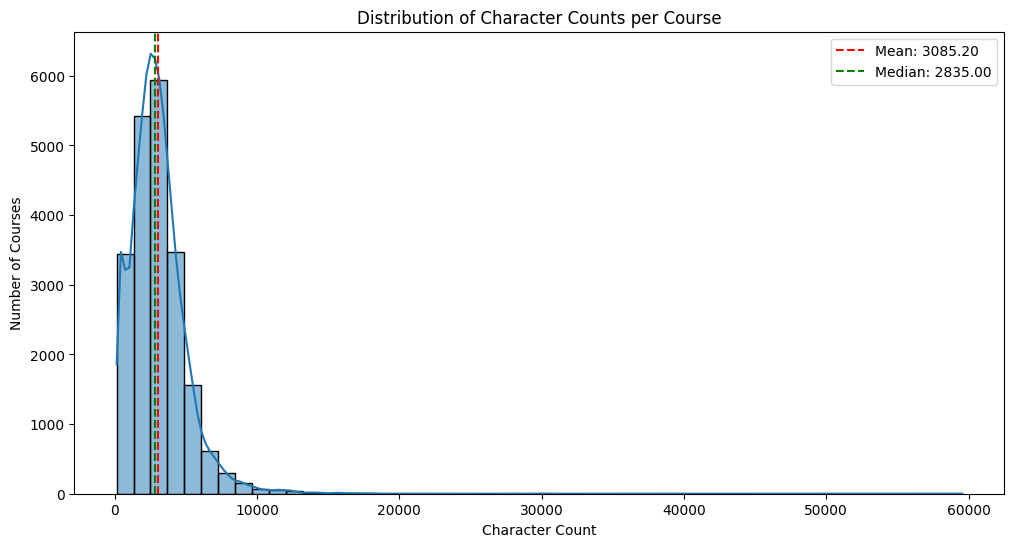

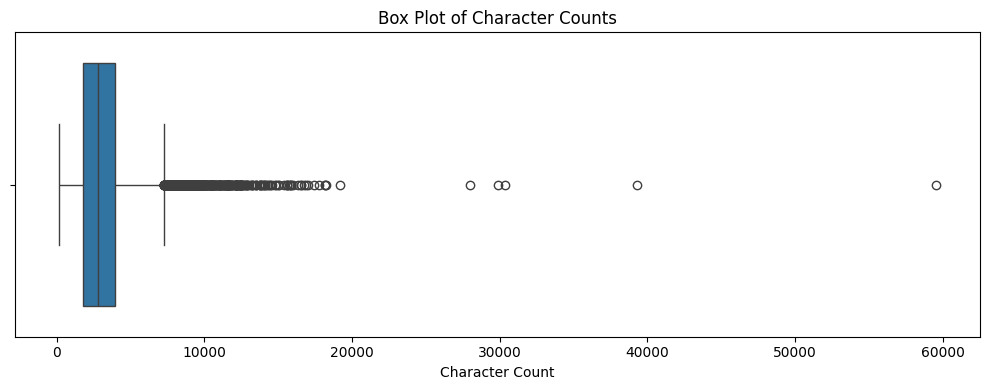

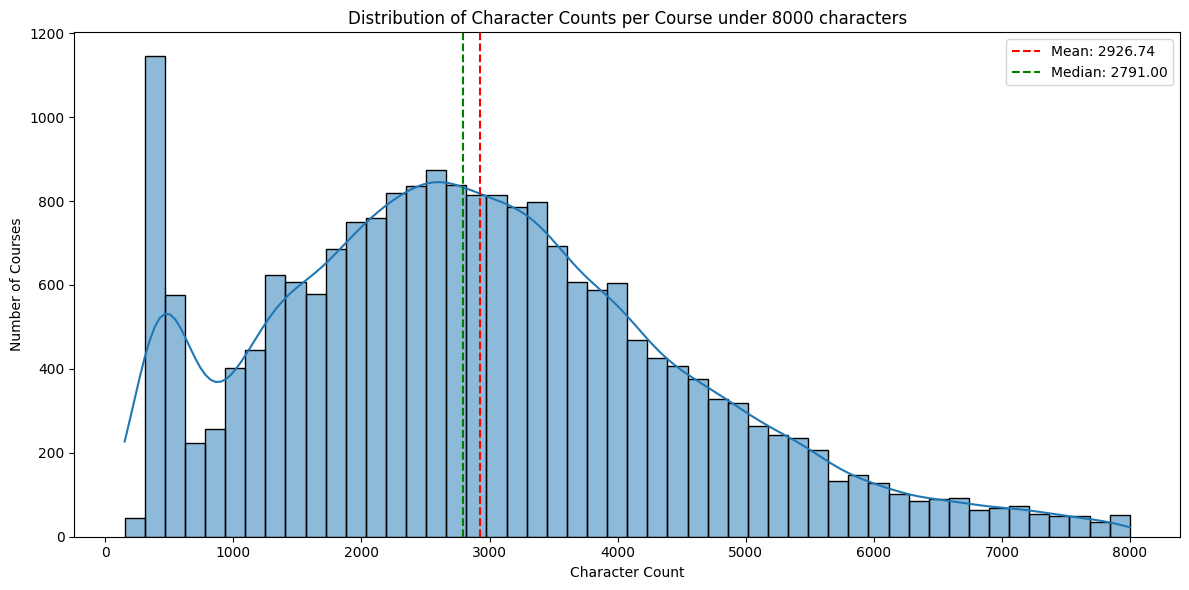

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def analyze_character_counts(df):
    # Count the number of characters for each row in the dataframe
    def count_characters(row):
        total_chars = 0
        for value in row:
            if isinstance(value, str):
                total_chars += len(value)
        return total_chars
    
    # Create a new dataframe with only character counts
    char_counts = pd.DataFrame()
    
    # Apply the function to each row and create a column with the character count
    char_counts['char_count'] = df.apply(count_characters, axis=1)
    
    # Get some statistics about the character counts
    print("\nCharacter count statistics:")
    print(f"Average characters per course: {char_counts['char_count'].mean():.2f}")
    print(f"Minimum characters: {char_counts['char_count'].min()}")
    print(f"Maximum characters: {char_counts['char_count'].max()}")
    print(f"Total characters across all courses: {char_counts['char_count'].sum()}")
    
    
    plt.figure(figsize=(12, 6))
    sns.histplot(char_counts['char_count'], bins=50, kde=True)
    plt.title('Distribution of Character Counts per Course')
    plt.xlabel('Character Count')
    plt.ylabel('Number of Courses')
    plt.axvline(char_counts['char_count'].mean(), color='r', linestyle='--', label=f'Mean: {char_counts["char_count"].mean():.2f}')
    plt.axvline(char_counts['char_count'].median(), color='g', linestyle='--', label=f'Median: {char_counts["char_count"].median():.2f}')
    plt.legend()
    
    # Box plot to show outliers
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=char_counts['char_count'])
    plt.title('Box Plot of Character Counts')
    plt.xlabel('Character Count')
    
    plt.tight_layout()
    plt.show()
    
    return char_counts

char_count = analyze_character_counts(df)

df_reduced = df.copy()
df_reduced["char_count"] = char_count["char_count"]
df_reduced = df_reduced[df_reduced["char_count"] <= 8000]


plt.figure(figsize=(12, 6))
sns.histplot(df_reduced['char_count'], bins=50, kde=True)
plt.title('Distribution of Character Counts per Course under 8000 characters')
plt.xlabel('Character Count')
plt.ylabel('Number of Courses')
plt.axvline(df_reduced['char_count'].mean(), color='r', linestyle='--', label=f'Mean: {df_reduced["char_count"].mean():.2f}')
plt.axvline(df_reduced['char_count'].median(), color='g', linestyle='--', label=f'Median: {df_reduced["char_count"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

Character count statistics by attribute:


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
LITERATURE_chars,21106.0,714.952336,823.443120,0.0,132.0,514.0,1008.0,1666.0,2140.00,3729.90,12959.0
SYLLABUS_chars,21106.0,614.671515,862.839608,0.0,168.0,410.0,774.0,1356.0,1914.75,3715.90,54800.0
OBJECTIVES_chars,21106.0,397.292855,335.557224,0.0,169.0,328.0,535.0,834.0,1039.00,1545.95,3272.0
LEARNING_OUTCOMES_chars,21106.0,333.121908,298.168962,0.0,138.0,287.0,462.0,662.0,848.50,1333.95,3976.0
DESCRIPTION_chars,21106.0,313.215105,33.224129,59.0,293.0,315.0,335.0,353.0,365.00,388.00,442.0
ASSESMENT_METHODS_chars,21106.0,187.579456,303.799730,0.0,30.0,98.0,224.0,445.0,667.00,1405.85,8547.0
TEACHER_INFO_chars,21106.0,148.421255,552.665314,0.0,0.0,0.0,93.0,383.0,746.75,1981.85,22721.0
TEACHING_METHODS_chars,21106.0,100.139865,160.638787,0.0,20.0,52.0,117.0,238.0,356.00,721.00,4670.0
TEACHERS_chars,21106.0,52.905335,118.210629,0.0,12.0,28.0,58.0,114.0,165.00,324.95,5768.0
TEXT_PREREQUISITS_chars,21106.0,45.379655,107.012615,0.0,0.0,0.0,51.0,142.0,216.00,478.00,2176.0


None


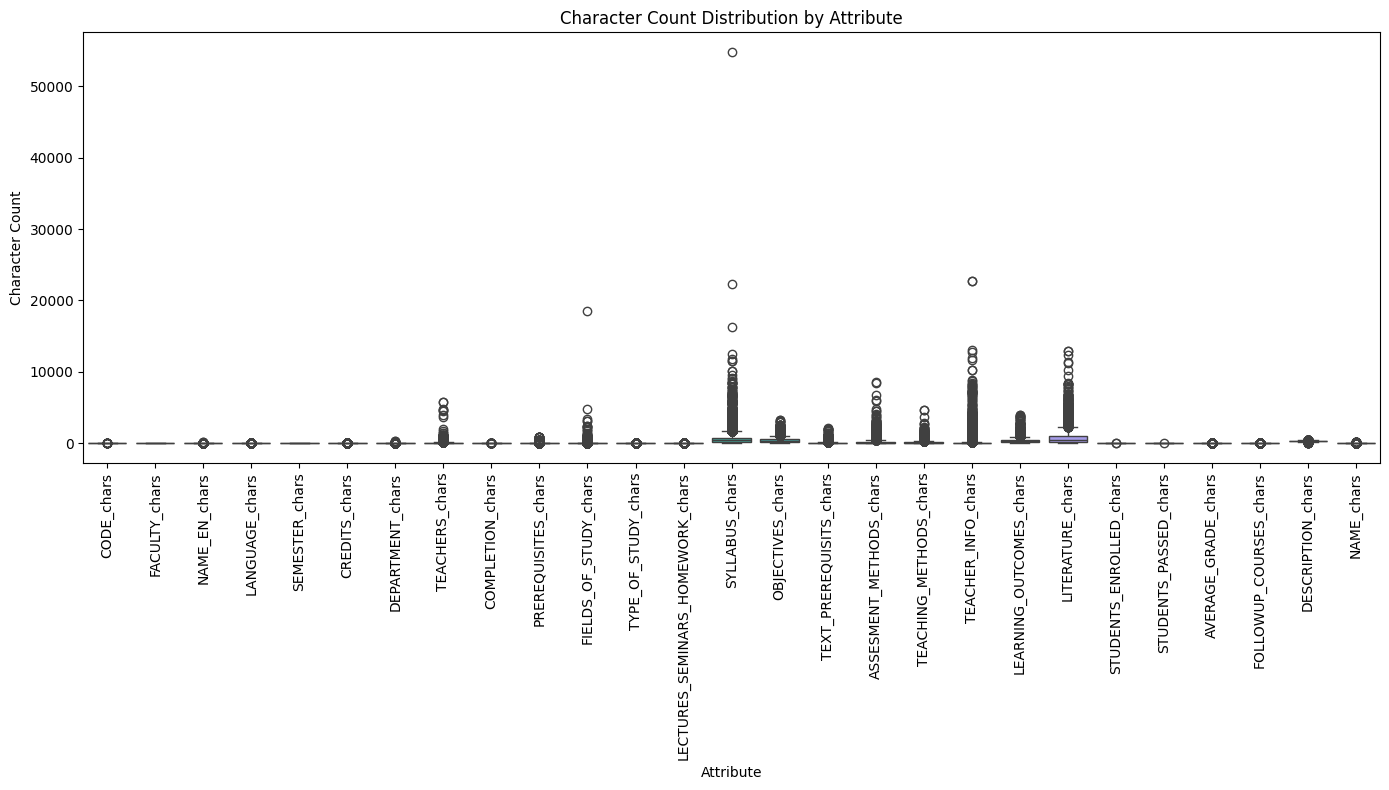

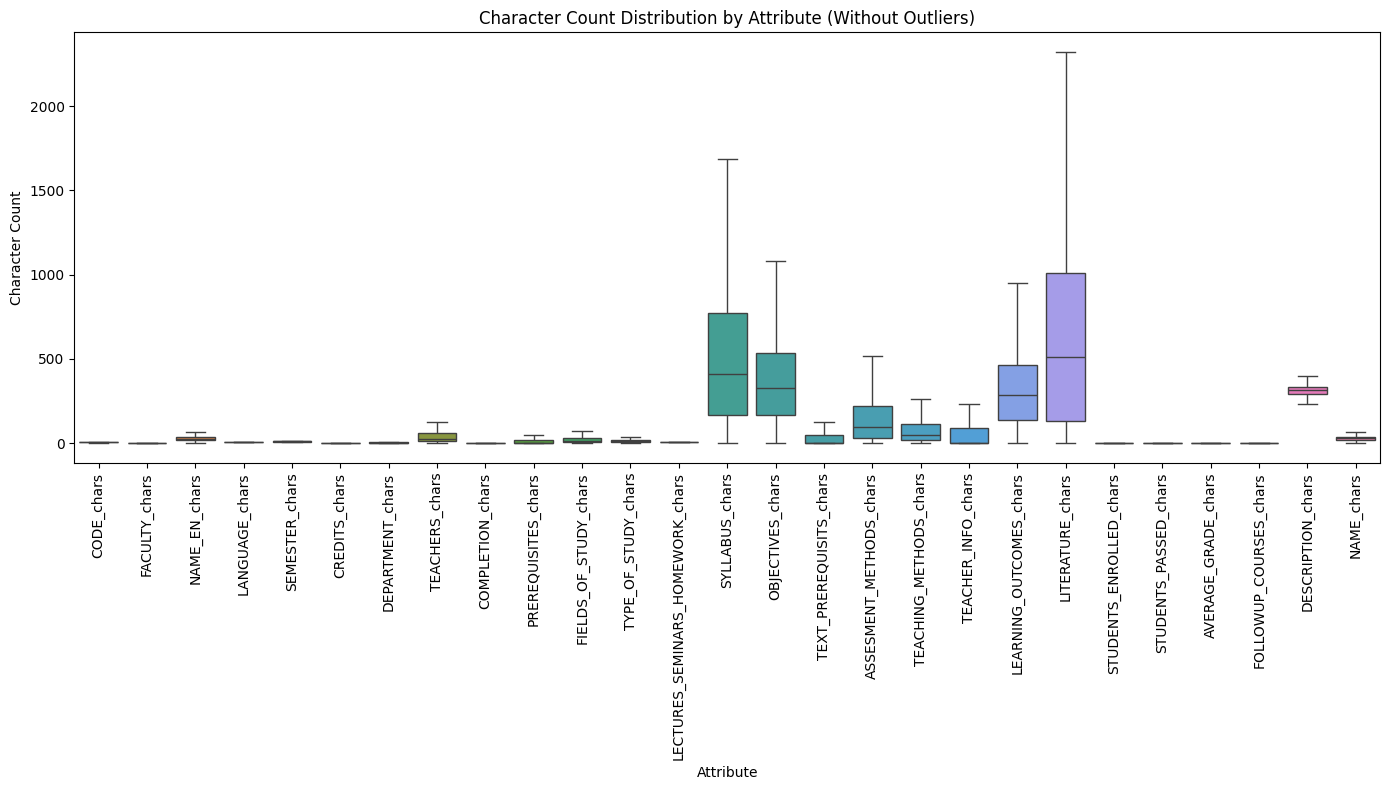

In [61]:
import pandas as pd

def analyze_attribute_character_counts(df):
    # Create a new dataframe to analyze character counts for each attribute
    attribute_char_counts = pd.DataFrame()

    # Get all string columns from the dataframe
    string_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Calculate character count for each attribute
    for column in string_columns:
        try:
            # Skip columns that might contain non-string values or lists/dicts
            if column in ['KEYWORDS', 'RATINGS']:
                continue
                
            # Calculate character length for each cell in the column
            attribute_char_counts[f'{column}_chars'] = df[column].astype(str).apply(len)
        except Exception as e:
            print(f"Skipping column {column}: {e}")

    # Display basic statistics for each attribute's character count
    print("Character count statistics by attribute:")
    print(display(attribute_char_counts.describe(percentiles=[.25, .50, .75, .90, .95, .99]).T.sort_values(by='mean', ascending=False)))

    # Create a box plot to visualize the distribution of character counts by attribute
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=attribute_char_counts)
    plt.title('Character Count Distribution by Attribute')
    plt.xlabel('Attribute')
    plt.ylabel('Character Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Create a more focused box plot without outliers for better visibility
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=attribute_char_counts, showfliers=False)
    plt.title('Character Count Distribution by Attribute (Without Outliers)')
    plt.xlabel('Attribute')
    plt.ylabel('Character Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

analyze_attribute_character_counts(df)

In [130]:
import re
import pandas as pd 

# Note: Accent removal is generally NOT recommended for text-embedding-004
# as it handles Unicode well and accents contain semantic information.
# This function assumes accents should be preserved.

# NOTE: temp
truncated_count = 0

def create_embedding_text(row):
    """
    Preprocesses relevant text fields from a DataFrame row to create
    a single structured string suitable for semantic embedding, applying
    truncation to potentially long fields.

    Args:
        row (pd.Series or dict-like): A row from a Pandas DataFrame
                                      containing course data.

    Returns:
        str: A structured string combining key textual fields for
             semantic embedding. Returns an empty string if no
             relevant text fields are found or if input is invalid.
    """
    if not isinstance(row, (pd.Series, dict)):
        raise ValueError("Input must be a Pandas Series or dictionary-like object.")

    # --- Configuration ---
    # Fields to combine into a single text block for semantic embedding
    # Ensure these column names match your DataFrame
    text_fields_for_embedding = [
        "NAME",
        "OBJECTIVES",
        "SYLLABUS",
        "TEXT_PREREQUISITS", # Check if this name is correct in your DataFrame
        "LEARNING_OUTCOMES",
        "ASSESMENT_METHODS",
        "TEACHING_METHODS",
        "LITERATURE",
    ]

    # Use more descriptive headers for the embedding model
    field_headers = {
        "NAME": "Course Name",
        "OBJECTIVES": "Course Objectives",
        "SYLLABUS": "Syllabus",
        "TEXT_PREREQUISITS": "Prerequisites Description",
        "LEARNING_OUTCOMES": "Learning Outcomes",
        "ASSESMENT_METHODS": "Assessment Methods",
        "TEACHING_METHODS": "Teaching Methods",
        "LITERATURE": "Recommended Literature",
    }

    # Define character limits for truncation (based on 95th/99th percentiles)
    # Fields not listed here will not be truncated.
    TRUNCATION_LIMITS = {
        "SYLLABUS": 3500,      
        "LITERATURE": 2500,     
        "OBJECTIVES": 1500,       
        "LEARNING_OUTCOMES": 1500, 
        "ASSESMENT_METHODS": 1500, 
        "TEXT_PREREQUISITS": 500,
        "TEACHING_METHODS": 750,
    }
    TRUNCATION_SUFFIX = "..."
    MAXIMUM_CHAR_COUNT = 8000

    # --- Processing ---
    embedding_text_parts = []
    global truncated_count

    for field in text_fields_for_embedding:
        # Safely get data from the row, handles missing columns/keys
        raw_text = row.get(field)

        # Check if text exists, is a string, and is not NaN before processing
        if isinstance(raw_text, str) and pd.notna(raw_text):
            # 1. Clean whitespace: strip leading/trailing and replace multiple spaces/newlines with one
            cleaned_text = re.sub(r"\s+", " ", raw_text.strip())

            # 2. Apply Truncation if necessary
            if field in TRUNCATION_LIMITS:
                limit = TRUNCATION_LIMITS[field]
                if len(cleaned_text) > limit:
                    truncated_count += 1;
                    # Truncate and add suffix
                    cleaned_text = cleaned_text[:limit - len(TRUNCATION_SUFFIX)] + TRUNCATION_SUFFIX

            # 3. Optional: Specific cleaning for LITERATURE (e.g., remove "info")
            # Apply *after* potential truncation if " info" could be near the end
            if field == "LITERATURE":
                cleaned_text = cleaned_text.replace(" info", "") # Simple removal

            # 4. Add to parts if there's non-empty content after cleaning/truncation
            if cleaned_text:
                header = field_headers.get(field, field) # Use defined header or the field name as fallback
                embedding_text_parts.append(f"{header}: {cleaned_text}")
        # You could add an else block here to log if a field is missing or not a string, if needed

    # 5. Check if total character count exceeds maximum limit
    # Calculate current total length
    current_total_length = sum(len(part) for part in embedding_text_parts)
    
    # If we're over the limit, we need to reduce text further
    if current_total_length > MAXIMUM_CHAR_COUNT:
        # Strategy: Proportionally reduce each field based on its current length
        while current_total_length > MAXIMUM_CHAR_COUNT:
            # Find the longest part to reduce first
            longest_part_index = max(range(len(embedding_text_parts)), 
                                    key=lambda i: len(embedding_text_parts[i]))
            content = embedding_text_parts[longest_part_index]
            
            # Reduce the content by 10% or at least 10 characters
            reduction = max(int(len(content) * 0.1), 10)
            # Make sure we don't reduce too much
            reduction = min(reduction, len(content) - 500)  # Keep at least 100 chars
            
            # Apply reduction
            if reduction > 0:
                new_content = content[:len(content) - reduction - len(TRUNCATION_SUFFIX)] + TRUNCATION_SUFFIX
                embedding_text_parts[longest_part_index] = header + new_content
            
            # Recalculate total length
            current_total_length = sum(len(part) for part in embedding_text_parts)
            

    # Combine the text parts into a single string, separated by double newlines
    embedding_text = "\n\n".join(embedding_text_parts)

    return embedding_text

course_row = df[df["CODE"] == "PV197"].iloc[0].to_dict() if not df[df["CODE"] == "PV197"].empty else {}
embedding_string = create_embedding_text(course_row)

print("--- Text for Embedding ---")
print(embedding_string)


--- Text for Embedding ---
Course Name: GPU Programming

Course Objectives: The goal of this course is to explain how to use GP GPU for general computation.

Syllabus: Introduction: motivation for GPU programming, GPU architecture, overview of parallelism model, basics of CUDA, first demonstration code GPU hardware and parallelism: detailed hardware description, synchronization, calculation on GPU -- rate of instruction processing, arithmetic precision, example of different approaches to matrix multiplication -- naive versus block-based Performance of GPUs: memory access optimization, instructions performance, an example of matrix transposition CUDA, tools and libraries: detailed description of CUDA API, compilation using nvcc, debugging, profiling, basic libraries, project assignment Optimization: general rules for algorithm design for GPU, revision of matrix multiplication, parallel reduction Parallelism in general: problem decomposition, dependence analysis, design analysis, paralle

Number of truncated values: 1758

Character count statistics:
Average characters per course: 2406.03
Minimum characters: 8
Maximum characters: 8010
Total characters across all courses: 50781572


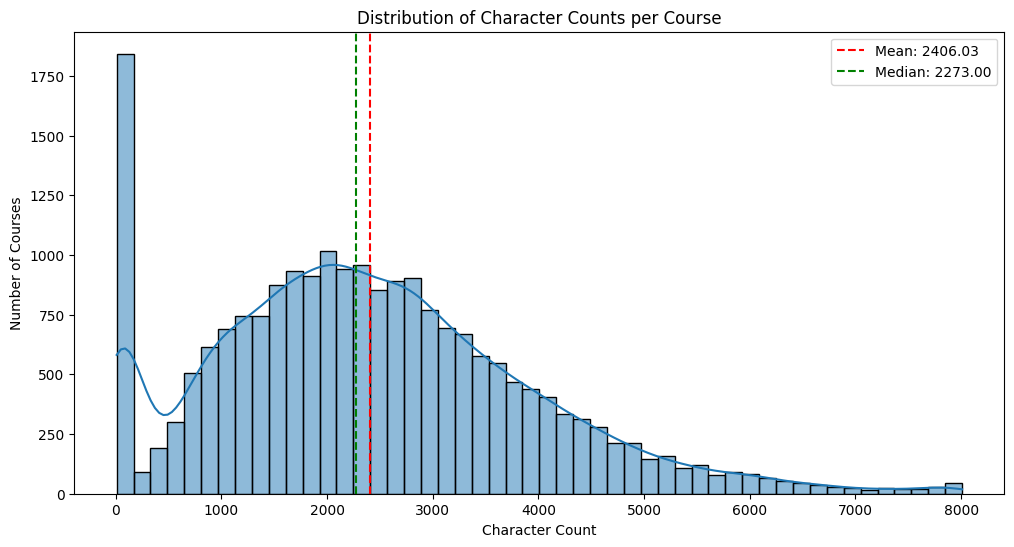

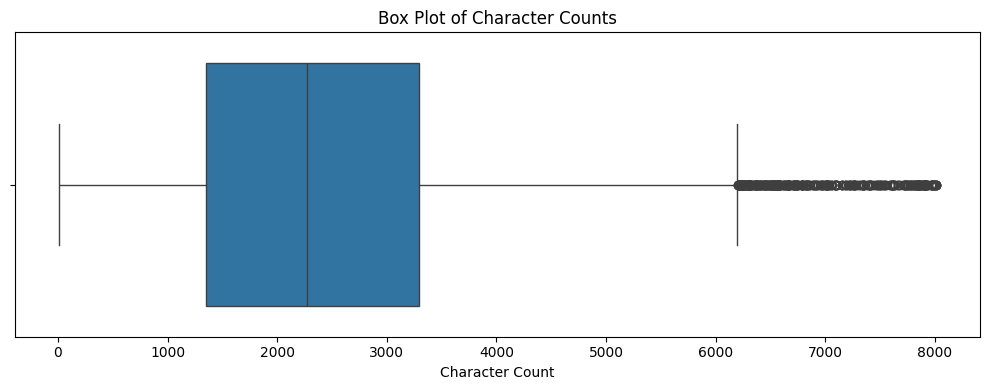


Top 20 courses by character count:
      CODE  char_count
  IREn5023        8010
  MPH_AOPR        8009
  MPP_PRFI        8009
    Bi8110        8007
  BPV_EUPP        8000
VLFA07212c        7994
     SO501        7990
   DSBcA13        7985
  VLVL7X61        7982
   PSMA023        7979
   PSD_SDZ        7976
  BPP_OPR1        7976
    PSDSDZ        7975
    SZ6061        7964
    UZB004        7960
  PSYb1600        7932
   PSMA003        7931
  HIB058bn        7926
    BIp025        7920
  MKP_PRFI        7917


In [132]:
embedding_df = df.copy()
truncated_count = 0
embedding_df["embedding_text"] = df.apply(create_embedding_text, axis=1)
print("Number of truncated values:", truncated_count)

embedding_df = embedding_df[['CODE', 'embedding_text']]
embedding_df.shape

embedding_df["char_count"] = analyze_character_counts(embedding_df)
embedding_df.describe(percentiles=[.25, .50, .75, .90, .95, .99, .999]).T

# Display the top 20 courses by character count
print("\nTop 20 courses by character count:")
top_20_by_chars = embedding_df.sort_values(by="char_count", ascending=False).head(20)
print(top_20_by_chars[["CODE", "char_count"]].to_string(index=False))